In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [5]:
iris=load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target']=iris.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,0.067797,0.2,0
1,4.9,3.0,0.067797,0.2,0
2,4.7,3.2,0.050847,0.2,0
3,4.6,3.1,0.084746,0.2,0
4,5.0,3.6,0.067797,0.2,0


In [12]:
scaler=MinMaxScaler()
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,0.067797,0.041667,0
1,4.9,3.0,0.067797,0.041667,0
2,4.7,3.2,0.050847,0.041667,0
3,4.6,3.1,0.084746,0.041667,0
4,5.0,3.6,0.067797,0.041667,0


In [20]:
df=df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')

In [22]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [23]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6795297632254395,
 0.5656776810037092,
 0.48617893493425096,
 0.4132667782512474]

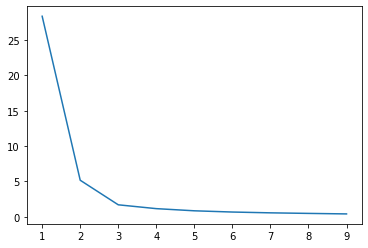

In [25]:
plt.plot(k_rng,sse)

In [26]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [29]:
df_result_comp=pd.DataFrame(df.target)

In [31]:
df_result_comp['new_pred_target']=y_pred

In [33]:
df['cluster']=y_pred

In [34]:
df.head()

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1


In [41]:
km.cluster_centers_

array([[0.55867014, 0.51041667],
       [0.07830508, 0.06083333],
       [0.7740113 , 0.81510417]])

In [35]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

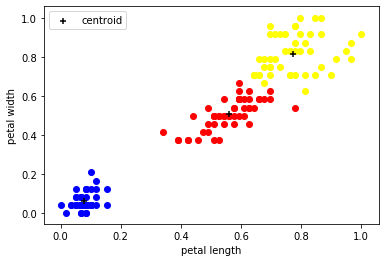

In [46]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',color='black',label='centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()